In [119]:
import os
%pwd

'C:\\ML_Projects\\MLflow_Implementation\\MLFlow-End-to-End-implementation'

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv(r"C:\ML_Projects\MLflow_Implementation\MLFlow-End-to-End-implementation\artifacts\data_ingestion\Train-Set.csv")
data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [121]:
# %pwd
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [122]:
data.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [123]:
data.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


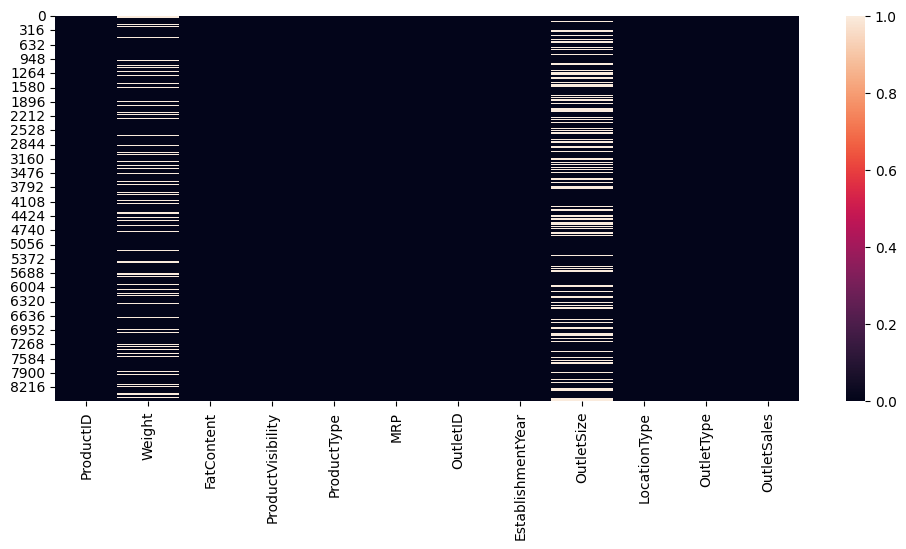

In [124]:
plt.figure(figsize=(12,5))
sns.heatmap(data=data.isnull())
plt.show()

In [125]:
print(data['OutletSize'].value_counts())
print("\n")
print(data['OutletSize'].mode())

OutletSize
Medium    2793
Small     2388
High       932
Name: count, dtype: int64


0    Medium
Name: OutletSize, dtype: object


In [126]:
data['Weight'].mean()

12.857645184135976

In [127]:
# data['Weight'] = data['Weight'].fillna(data['Weight'].mean())
# data['OutletSize'] = data['OutletSize'].fillna(data['OutletSize'].mode()[0])
data['Weight'].fillna(data['Weight'].mean(),inplace=True)
data['OutletSize'].fillna(data['OutletSize'].mode()[0],inplace=True)

C:\Users\Vipin Vashisth\AppData\Local\Temp\ipykernel_20180\2112797360.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Weight'].fillna(data['Weight'].mean(),inplace=True)
C:\Users\Vipin Vashisth\AppData\Local\Temp\ipykernel_20180\2112797360.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [128]:
data.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

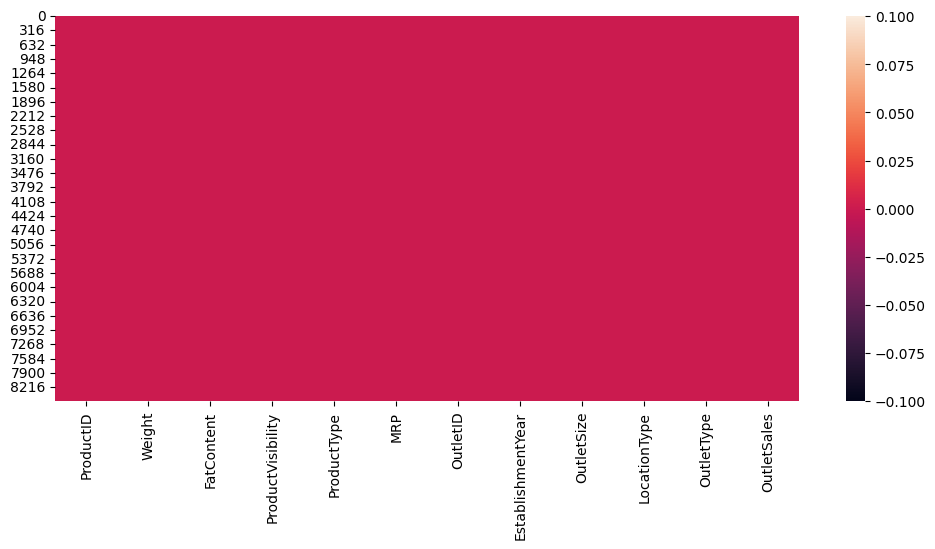

In [129]:
plt.figure(figsize=(12,5))
sns.heatmap(data.isnull())
plt.show()

In [130]:
data

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [131]:
data.drop(["ProductID", "OutletID"], axis=1, inplace=True)

In [132]:
data.shape

(8523, 10)

In [133]:
data.columns

Index(['Weight', 'FatContent', 'ProductVisibility', 'ProductType', 'MRP',
       'EstablishmentYear', 'OutletSize', 'LocationType', 'OutletType',
       'OutletSales'],
      dtype='object')

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weight             8523 non-null   float64
 1   FatContent         8523 non-null   object 
 2   ProductVisibility  8523 non-null   float64
 3   ProductType        8523 non-null   object 
 4   MRP                8523 non-null   float64
 5   EstablishmentYear  8523 non-null   int64  
 6   OutletSize         8523 non-null   object 
 7   LocationType       8523 non-null   object 
 8   OutletType         8523 non-null   object 
 9   OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [135]:
os.chdir("../")
%pwd

'C:\\ML_Projects\\MLflow_Implementation'

In [148]:
from dataclasses import dataclass
from pathlib import Path

@dataclass(frozen=True)
class DataValidationConfig:
    root_dir: Path
    STATUS_FILE: str
    unzip_data_dir: Path
    all_schema : dict

In [149]:
from src.mlflowProject.constants import *
from src.mlflowProject.utils.common import read_yaml, create_directories

In [150]:
class ConfigurationManager:
    def __init__(
            self,
            config_filepath = CONFIG_FILE_PATH,
            params_filepath = PARAMS_FILE_PATH,
            schema_filepath = SCHEMA_FILE_PATH):
        self.config = read_yaml(config_filepath)
        self.params = read_yaml(params_filepath)
        self.schema = read_yaml(schema_filepath)

        create_directories([self.config.artifacts_root])
    
    def get_data_validation_config(self) -> DataValidationConfig:
        config = self.config.data_validation
        schema = self.schema.COLUMNS

        create_directories([config.root_dir])

        data_validation_config = DataValidationConfig(
            root_dir= config.root_dir,
            STATUS_FILE=config.STATUS_FILE,
            unzip_data_dir=config.unzip_data_dir,
            all_schema = schema
        )
        return data_validation_config

In [151]:
import os
from mlflowProject import logger

In [158]:
os.chdir(r"C:\ML_Projects\MLflow_Implementation\MLFlow-End-to-End-implementation")

In [159]:
class DataValidation:
    def __init__(self,config:DataValidationConfig):
        self.config = config
    
    def validate_all_columns(self)-> bool:
        try:
            validation_stauts = None

            data = pd.read_csv(self.config.unzip_data_dir)
            all_cols = list(data.columns)
            all_schema = self.config.all_schema.keys()

            for col in all_cols:
                if col not in all_schema:
                    validation_stauts = False
                    with open(self.config.STATUS_FILE,'w') as f:
                        f.write(f"Validation status: {validation_stauts}")
                else: 
                    validation_stauts = True
                    with open(self.config.STATUS_FILE,"w") as f:
                        f.write(f"validation status: {validation_stauts}")
            return validation_stauts
        except Exception as e:
            raise e

In [160]:
try: 
    config = ConfigurationManager()
    data_validation_config = config.get_data_validation_config()
    data_validation = DataValidation(config=data_validation_config)
    data_validation.validate_all_columns()

except Exception as e:
    raise e

[2024-11-02 23:19:54,583: INFO: common: json file loaded sucessfully from: C:\ML_Projects\MLflow_Implementation\MLFlow-End-to-End-implementation\config\config.yaml]
[2024-11-02 23:19:54,586: INFO: common: json file loaded sucessfully from: C:\ML_Projects\MLflow_Implementation\MLFlow-End-to-End-implementation\params.yaml]
[2024-11-02 23:19:54,587: INFO: common: json file loaded sucessfully from: C:\ML_Projects\MLflow_Implementation\MLFlow-End-to-End-implementation\schema.yaml]
[2024-11-02 23:19:54,588: INFO: common: created directory at artifacts]
[2024-11-02 23:19:54,589: INFO: common: created directory at artifacts/data_validation]
